数据一般都被记录在存储当中，我们常见的小规模数据大多是 Excel 的 xlsx，csv, json, 或 txt，log 等等格式。 当我们要处理数据，特别是运算数据的时候，我们都能拿 Python 读取出来。而在大数据这种情况下，数据是存储在 MySQL，Mongodb 等这种数据库中的， 同样，Python 也提供了很多接口来读取这些数据。

今天我们想聊聊其中的一部分，用 Numpy 来直接读取数据（通常是纯数值形式的数据），并加以运算的流程。而且看看我们可以如何保存 Numpy 里的数据。

### 加载常用数据格式
我们经常将数据存放在文件中，你的数据可能就像下面这些一样。
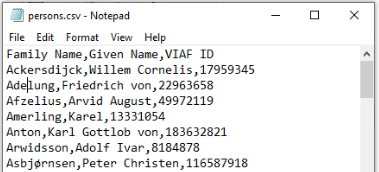

从 excel 里打开，也可能更像下面这样。
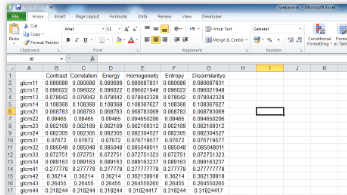

我已经提前为你准备了一份数据，如果你学过前面 数据清洗 的教学，那么你就不会陌生， 我直接从里面 copy 了一份，作为 csv 格式存储在你浏览器沙箱的目录下了。如果你想用 Python 的 os 看看数据的样貌， 你可以运行下面的这串代码。我们看看 read-save-data/ 目录下的数据有哪些，长啥样吧~

In [1]:
import os 
print("data file in directory:", os.listdir("read-save-data"))
with open("read-save-data/data.csv", "r") as f:
    print("\n", f.read())

data file in directory: ['data.csv']

 Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.0,8
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
2020-01-27,2927,82,61,2784,809,26,9,2.8,2.08,134.43,16
2020-01-28,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16
2020-01-29,6166,133,125,5908,588,2,18,2.16,2.03,106.4,18
2020-01-30,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20
2020-01-31,9927,213,219,9495,1693,42,78,2.15,2.21,97.26,24
2020-02-01,12038,259,281,11498,2111,46,62,2.15,2.33,92.17,25
2020-02-02,16787,362,459,15966,4749,103,178,2.16,2.73,78.87,25


比如在 loadtxt 的参数中，我们传入 , 让 numpy 在做数据分隔的时候，以逗号作为分隔符。同时 skiprow skip 掉第一行描述文字 （其实不设置这个的话，它好像也会自动帮你 skip），还有读取出来的数据要放到 dtype=np.int64 类型的 array 中。 你看一行功能，就能轻松读取出来这 csv 的数据了。

注意，np.loadtxt() 为什么不叫 np.loadcsv() 呢？因为 csv 数据也是纯文本数据，我还存了一个 read-save-data/data.txt 文件，你在上面再试试， 看能不能用 np.loadtxt() 加载 read-save-data/data.txt?

上面就是最普通的一种加载数据方式。下面我们来看一种更有趣的加载过程。我能不能直接从字符中加载数据呢？

有时候，我需要对字符串加工处理后，然后直接读这个加工后的字符串。

In [3]:
import numpy as np
row_string = "20131, 10, 67, 20132, 11, 88, 20133, 12, 98, 20134, 8, 100, 20135, 9, 75, 20136, 12, 78"
data = np.fromstring(row_string, dtype=np.int64, sep=",")
data = data.reshape(6, 3)
print(data)

[[20131    10    67]
 [20132    11    88]
 [20133    12    98]
 [20134     8   100]
 [20135     9    75]
 [20136    12    78]]


注意，这种方法目前应该是只能读取一个数值序列，读完这个序列后，你可以再用 Numpy 的方法给他 reshape 成你想要的样子。另外要注意的，对比 np.loadtxt(delimiter=",") 和 np.fromstring(sep=",") 这两个用来判断分隔符的参数，它们的参数命名是不一样的。

有同学会问了，上面只讲了 csv 和 txt 格式的数据，那 Numpy 能读 Excel 中的 xlsx 数据格式吗？答案是不能！ 但是未来我们会讲 Pandas 库的教学，这个库就能读 xlsx 数据格式。

### 保存数据
看了几种日常生活中经常会碰到的数据格式，都能用 Numpy 读，那么读完之后，或者处理完数据之后，我想保存起来，怎么办呢？ 还在 Numpy 还是挺人性化的，也有丰富的方法来处理保存数据这件事。

Numpy 存数据，存哪种数据格式，取决于你想不想这份数据被人查看，或者被其他语言编辑，如果想的话，你就会保存成一些通用的数据格式，比如 csv 或 txt。

In [4]:
print("numpy data:\n", data)
np.savetxt("read-save-data/save_data.csv", data, delimiter=",", fmt='%s')

print("data file in directory:", os.listdir("read-save-data"))
with open("read-save-data/save_data.csv", "r") as f:
    print("\n", f.read())

numpy data:
 [[20131    10    67]
 [20132    11    88]
 [20133    12    98]
 [20134     8   100]
 [20135     9    75]
 [20136    12    78]]
data file in directory: ['data.csv', 'save_data.csv']

 20131,10,67
20132,11,88
20133,12,98
20134,8,100
20135,9,75
20136,12,78



还有一些 Numpy 独有的模式，那就是用二进制的格式保存。如果你没有想让别人看你的数据，你只想自己使用 Numpy 时加载的话，那你完全就可以用这种方式存储下来。 注意，使用 np.save() 来保存，保存的是一个以 .npy 结尾的二进制文件。加载的时候，我们能用 np.load() 直接加载这个二进制数据文件。

In [5]:
np.save("read-save-data/save_data.npy", data)

print("data file in directory:", os.listdir("read-save-data"))
npy_data = np.load("read-save-data/save_data.npy")
print(npy_data)

data file in directory: ['data.csv', 'save_data.csv', 'save_data.npy']
[[20131    10    67]
 [20132    11    88]
 [20133    12    98]
 [20134     8   100]
 [20135     9    75]
 [20136    12    78]]


还有一个更神奇的保存方式，我们可以在一个 numpy 文件中保存多个 numpy array。有时候，你是分开多个 array 来存放不同类型的数据，比如机器学习中的 traindata 和 testdata。这时我们能用 np.savez() 保存一个 .npz 文件将这两个 array 同时存储好。

In [6]:
train_data = np.array([1,2,3])
test_data = np.array([11,22,33])

np.savez("read-save-data/save_data.npz", train=train_data, test=test_data)
print("data file in directory:", os.listdir("read-save-data"))


data file in directory: ['data.csv', 'save_data.csv', 'save_data.npy', 'save_data.npz']


np.savez() 第二、三个参数名 train=xx, test=xx 其实是可以自定义的，这些参数名会作为之后我们加载回来的索引标签。

In [7]:
npz_data = np.load("read-save-data/save_data.npz")
print("train:", npz_data["train"])
print("test:", npz_data["test"])

train: [1 2 3]
test: [11 22 33]


用 np.savez() 的时候，还有一个方法可以让你更节省空间，那就是用 np.savez_compressed() 来做一次数据压缩。

In [8]:
np.savez_compressed("read-save-data/save_data_compressed.npz", train=train_data, test=test_data)
print("data file in directory:", os.listdir("read-save-data"))

npz_data_compressed = np.load("read-save-data/save_data_compressed.npz")
print("train:", npz_data_compressed["train"])
print("test:", npz_data_compressed["test"])

import os
print("compressed file size:", os.path.getsize("read-save-data/save_data_compressed.npz"))
print("original file size:", os.path.getsize("read-save-data/save_data.npz"))


data file in directory: ['data.csv', 'save_data.csv', 'save_data.npy', 'save_data.npz', 'save_data_compressed.npz']
train: [1 2 3]
test: [11 22 33]
compressed file size: 402
original file size: 528


### 总结
说了这么多用 numpy 的方式读取与保存的方法，可见 numpy 还是很用心在做数据这件事的。如果你喜欢纯文本，我们看上去比较有意义的存储格式，那你就用 txt 或者 csv 这种方式，如果你追求存储空间和速度，我建议还是用二进制来存储吧~